In [3]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

In [4]:
target = []
images = []   # In matrix format
flat_data = []  # In vector format

datadir = '/content/drive/MyDrive/KNN-DREAS/Dataset'
categories = ['Katarak','Normal']

for category in categories:
  class_index=categories.index(category)
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_matrix=imread(os.path.join(path,img))
    img_resized=resize(img_matrix,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(category)


In [5]:
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target

In [6]:
# Final dataframe after pre-processing
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.668089,0.487659,0.358285,0.765605,0.573798,0.455801,0.816677,0.636285,0.506873,0.871516,...,0.984379,0.874575,0.792222,0.984391,0.874587,0.792235,0.988222,0.878419,0.796066,Katarak
1,0.923210,0.987118,0.975835,0.943588,0.962663,0.954758,0.978469,0.932519,0.926541,0.950665,...,0.953204,0.914274,0.875647,0.963016,0.934443,0.909227,0.991183,0.979845,0.985305,Katarak
2,0.956781,0.854820,0.764624,0.935139,0.833179,0.742982,0.899570,0.797609,0.707413,0.862824,...,0.658205,0.458209,0.352327,0.737375,0.541290,0.435408,0.749411,0.553333,0.447450,Katarak
3,0.876469,0.727449,0.645096,0.843751,0.694731,0.612378,0.844311,0.695292,0.612939,0.859689,...,0.868167,0.748546,0.717804,0.871843,0.740224,0.713849,0.876550,0.739309,0.715738,Katarak
4,0.934659,0.668366,0.545366,0.923840,0.654882,0.532770,0.910800,0.651855,0.526607,0.928146,...,0.965371,0.790521,0.661736,0.961927,0.800195,0.681609,0.964674,0.803890,0.686242,Katarak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0.290282,0.286360,0.266753,0.402960,0.399039,0.379431,0.386434,0.382422,0.362814,0.287283,...,0.956143,0.749308,0.642436,0.955485,0.755438,0.649570,0.960065,0.760065,0.654182,Normal
1064,1.000000,0.788235,0.639216,1.000000,0.788684,0.639664,1.000000,0.791974,0.642954,1.000000,...,0.828235,0.577255,0.435786,0.813808,0.569730,0.418156,0.808359,0.565221,0.412280,Normal
1065,0.832384,0.620619,0.581403,0.845855,0.634090,0.594875,0.837388,0.625624,0.586408,0.830709,...,0.674092,0.442719,0.379974,0.667895,0.436523,0.373778,0.664915,0.433542,0.370797,Normal
1066,0.365327,0.250889,0.227716,0.359783,0.245556,0.222277,0.391664,0.276222,0.253551,0.422247,...,0.801225,0.600074,0.573390,0.811459,0.613898,0.584802,0.809679,0.611494,0.582818,Normal


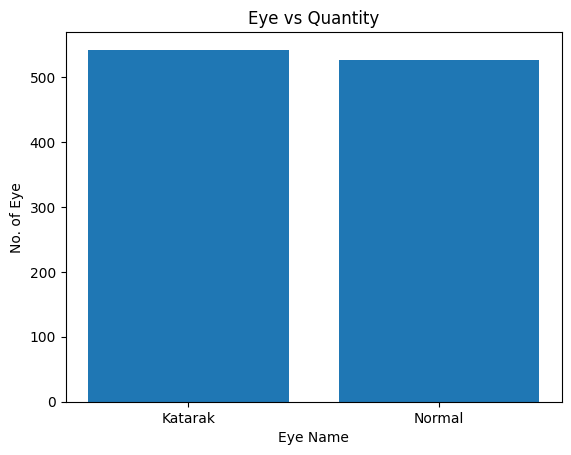

In [7]:
# Display of the number of images of each eye type
plt.bar(categories,df['Target'].value_counts())
plt.title('Eye vs Quantity')
plt.xlabel('Eye Name')
plt.ylabel('No. of Eye')
plt.show()


In [8]:
# Input and Output
x=df.iloc[:,0:67500].values
y=df.iloc[:,67500].values

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k=np.arange(1,160)
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param)
model_grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159])})

In [10]:
# Best K nearest neighbor
model_grid.best_params_

{'n_neighbors': 1}

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
model = KNeighborsClassifier(n_neighbors=21,metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [28]:
# Predicted output
y_pred = model.predict(x_test)
y_pred

array(['Normal', 'Normal', 'Katarak', 'Normal', 'Katarak', 'Normal',
       'Katarak', 'Normal', 'Normal', 'Katarak', 'Katarak', 'Katarak',
       'Katarak', 'Katarak', 'Normal', 'Katarak', 'Normal', 'Katarak',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Katarak', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Katarak', 'Normal',
       'Katarak', 'Katarak', 'Normal', 'Katarak', 'Katarak', 'Katarak',
       'Normal', 'Katarak', 'Katarak', 'Katarak', 'Normal', 'Katarak',
       'Normal', 'Katarak', 'Katarak', 'Normal', 'Normal', 'Normal',
       'Katarak', 'Katarak', 'Normal', 'Katarak', 'Katarak', 'Katarak',
       'Normal', 'Katarak', 'Normal', 'Katarak', 'Normal', 'Normal',
       'Katarak', 'Normal', 'Katarak', 'Katarak', 'Normal', 'Normal',
       'Katarak', 'Katarak', 'Normal', 'Normal', 'Normal', 'Katarak',
       'Katarak', 'Normal', 'Katarak', 'Katarak', 'Katarak', 'Katarak',
       'Katarak', 'Ka

In [29]:
# Actual output
y_test

array(['Normal', 'Normal', 'Katarak', 'Normal', 'Katarak', 'Katarak',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Katarak',
       'Normal', 'Katarak', 'Normal', 'Normal', 'Normal', 'Katarak',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Katarak', 'Katarak',
       'Katarak', 'Katarak', 'Normal', 'Katarak', 'Normal', 'Katarak',
       'Normal', 'Katarak', 'Katarak', 'Katarak', 'Normal', 'Normal',
       'Normal', 'Katarak', 'Katarak', 'Normal', 'Normal', 'Normal',
       'Katarak', 'Katarak', 'Normal', 'Normal', 'Katarak', 'Katarak',
       'Normal', 'Katarak', 'Normal', 'Katarak', 'Normal', 'Katarak',
       'Katarak', 'Normal', 'Katarak', 'Katarak', 'Normal', 'Normal',
       'Katarak', 'Katarak', 'Normal', 'Katarak', 'Normal', 'Katarak',
       'Katarak', 'Normal', 'Normal', 'Katarak', 'Katarak', 'Katarak',
       'Katarak', 'Normal',

In [30]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy of the model is  77.15355805243446 %


In [31]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[ 86,  35],
       [ 26, 120]])

In [32]:
# Classification report
from sklearn import metrics
metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n     Katarak       0.71      0.77      0.74       112\n      Normal       0.82      0.77      0.80       155\n\n    accuracy                           0.77       267\n   macro avg       0.77      0.77      0.77       267\nweighted avg       0.78      0.77      0.77       267\n'

In [33]:
img1=imread('/content/drive/MyDrive/KNN-DREAS/test1.jpg')
img1_resize = resize(img1,(150,150,3))
img1_flatten = img1_resize.flatten()


In [34]:
img1_pred = model.predict([img1_flatten])
img1_pred

array(['Normal'], dtype=object)

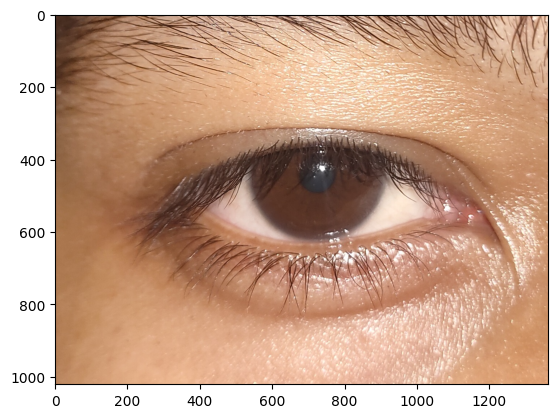

In [35]:
plt.imshow(img1)

In [39]:
# Resizing and flattening new image 2
img2=imread('/content/drive/MyDrive/KNN-DREAS/test2.jpg')
img2_resize = resize(img2,(150,150,3))
img2_flatten = img2_resize.flatten()

In [40]:
img2_pred = model.predict([img2_flatten])
img2_pred

array(['Normal'], dtype=object)

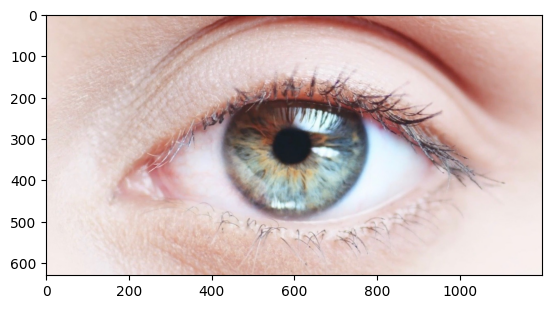

In [41]:
plt.imshow(img2)

In [42]:
img3=imread('/content/drive/MyDrive/KNN-DREAS/test3.jpg')
img3_resize = resize(img3,(150,150,3))
img3_flatten = img3_resize.flatten()

In [43]:
img3_pred = model.predict([img3_flatten])
img3_pred

array(['Katarak'], dtype=object)

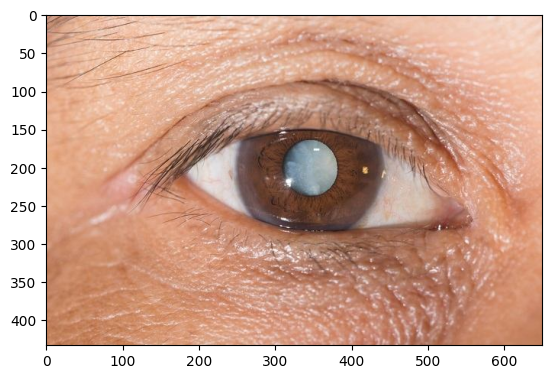

In [44]:
plt.imshow(img3)